# I. IMPORT REQUIRED LIBRARIES

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import time
import pickle

# Plotation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import plotly.express as px

# Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import mutual_info_classif

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score,
    precision_score, recall_score, log_loss, precision_recall_curve, auc,
    classification_report
)

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss

# Hyperparameter Tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (
    KFold, train_test_split, cross_val_score, StratifiedKFold,
    RandomizedSearchCV, GridSearchCV, HalvingRandomSearchCV
)
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Misc
from sklearn.metrics import make_scorer
from joblib import Parallel, delayed

# II. UPLOAD DATA

In [ ]:
# Import Original Data
train_org = pd.read_csv("train.csv")
train = train_org.copy()

# III. OVERVIEW THE DATASET

In [ ]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
train_record, train_feature = train.shape
print(f"The Train Dataset have: {train_record} records \nThe Train Dataset have: {train_feature} features")

The Train Dataset have: 381109 records 
The Train Dataset have: 12 features


In [ ]:
# Checking for duplicated data
train_duplicated = train.duplicated()
train_duplicated.value_counts()

False    381109
dtype: int64

---
After reviewing the train dataset, we can draw some conclusions as follows:
- The train set contains **381109 records**, equivalent to 381109 rows.
- The train set has **12 features**, equivalent to 12 columns, including one target column named Response.
- The train set does not have any null values or duplicated values.
- The data columns in the train set are currently in the correct format, and no adjustments are needed.
- Some columns contain values that fall under categorical variables, for example, the columns Gender, Driving_License, Previously_Insured, Vehicle_Age, Vehicle_Damage, and Response.

# IV. DATA VISUALIZATION
----
Now, we will conduct Exploratory Data Analysis (EDA) on the independent variables to assess their impact on the target variable - "Response", in order to identify significant factors influencing customer decisions regarding vehicle insurance purchases.

## 2.1 Univariate Charts:

### 2.1.1 ID

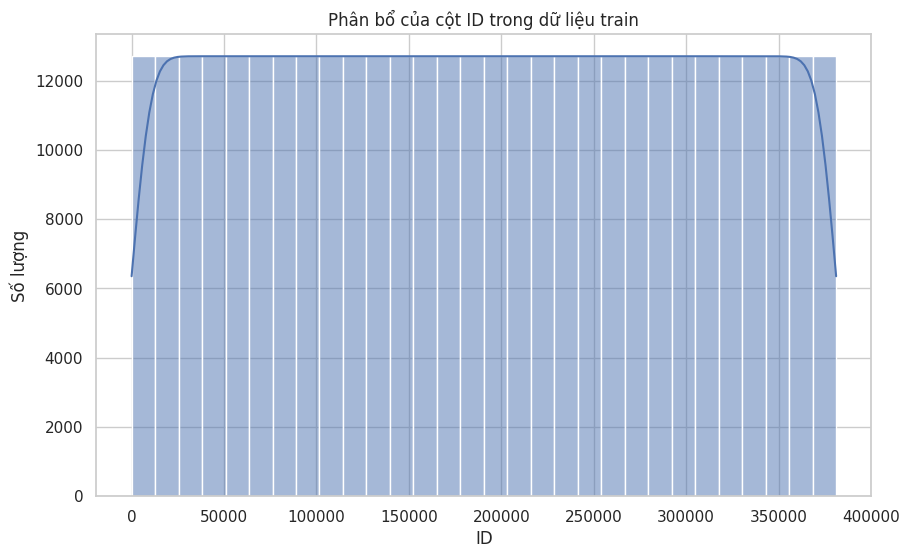

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['id'], kde=True, bins=30)
plt.title('Phân bổ của cột ID trong dữ liệu train')
plt.xlabel('ID')
plt.ylabel('Số lượng')
plt.show()

**Insight and Conclusion:**
- The id column does not offer any analytical value or predictive power because it is simply a sequence of unique numbers assigned to each record for identification purposes.
- For data analysis or modeling purposes, the id column should generally be removed or ignored because it does not contain information that correlates with the target variable or any other variable of interest.
- Keeping the id column in the dataset during analysis or modeling could unnecessarily increase the dimensionality of the data without adding value, potentially leading to inefficient processing and analysis.

In [ ]:
train.drop('id', axis =1, inplace=True)

### 2.1.2 Gender

In [ ]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

([<matplotlib.axis.XTick at 0x795b689047c0>,
 [Text(0, 0, '0:Male'), Text(1, 0, '1:Female')])

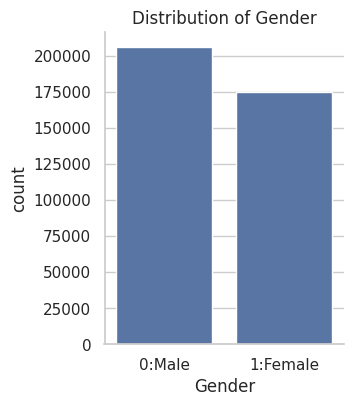

In [ ]:
sns.catplot(x="Gender",
                data=train, kind="count",
                height=4, aspect=.9);
plt.title('Distribution of Gender')
plt.xticks([0,1], ['0:Male', '1:Female'])

**Insight:**

- There is a noticeable difference in the gender distribution among the survey participants. Specifically, there are more Male (206,089) customers than Female (175,020) customers. This difference suggests that males are slightly more represented in this customer base.
- The gender composition might influence the interest in vehicle insurance, as preferences and needs for insurance products can vary between genders due to factors like risk aversion, vehicle usage patterns, and other socio-economic factors.
- For insurance companies, understanding the gender distribution is crucial as it could help tailor marketing strategies and insurance product offerings to better meet the specific needs and preferences of different gender groups.

### 2.1.3 Age

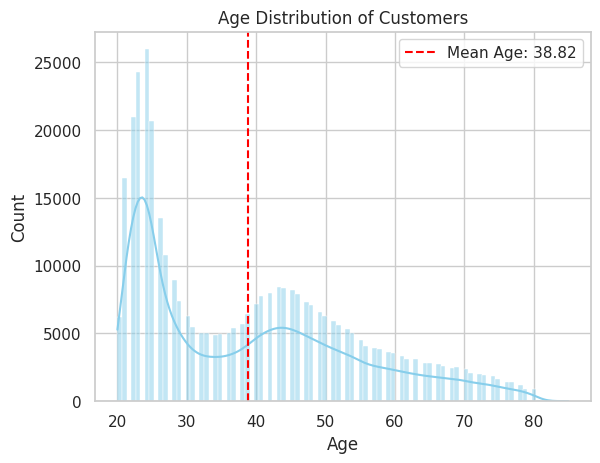

In [ ]:
# Create a countplot with KDE for 'Age'
sns.set(style="whitegrid")
ax = sns.histplot(data=train, x='Age', kde=True, color='skyblue')

# Add a vertical line for the mean age
mean_age = train['Age'].mean()
ax.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')

# Set plot title and labels
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")

# Add legend
plt.legend()

# Show the plot
plt.show()


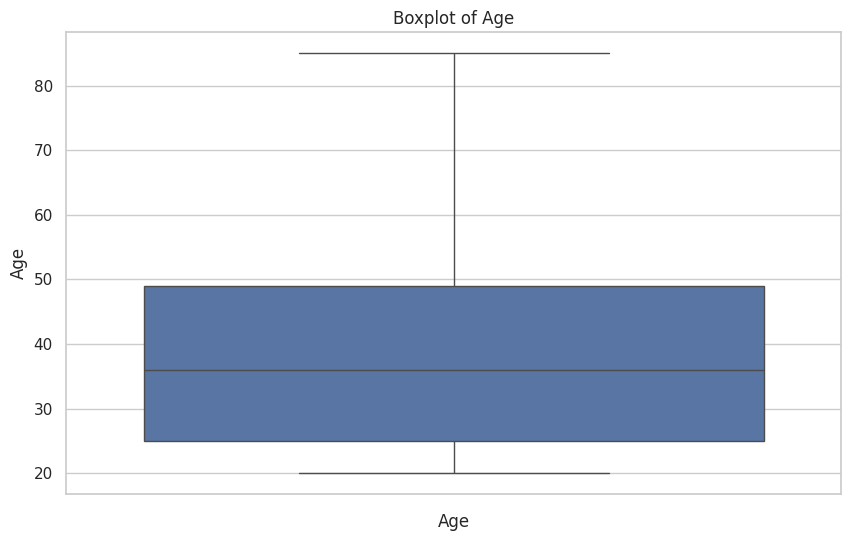

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(train['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

**Insights:**
- The histogram of Age shows a wide range of customer ages, with a noticeable peak among younger customers, indicating a significant proportion of the customer base is young. There's a gradual decline in frequency as age increases, suggesting fewer older customers.
- This distribution highlights the importance of age in tailoring insurance products and marketing strategies, as younger customers may have different insurance needs and risk profiles compared to older customers.

**Concluding Insights:**
- Age plays a critical role in understanding customer demographics and tailoring insurance offerings. Younger populations represent a significant portion of the market, possibly indicating different risk preferences and insurance needs.


### 2.1.4 Driving_License

Text(0, 0.5, 'Count')

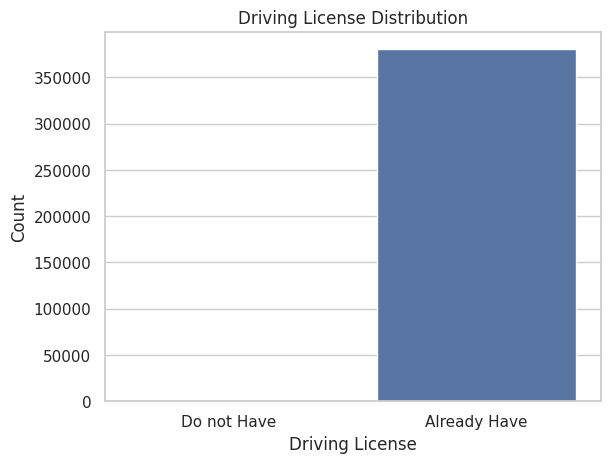

In [ ]:
sns.countplot(x = 'Driving_License', data = train)
plt.title('Driving License Distribution')
plt.xticks([0,1], [ 'Do not Have', 'Already Have'])
plt.xlabel('Driving License')
plt.ylabel('Count')

In [ ]:
Do_Not_Have, Already_Have = train['Driving_License'].value_counts()
print(f'There are {Do_Not_Have} customer already have Driving License \nThere are {Already_Have} customer do not have Driving License')

There are 380297 customer already have Driving License 
There are 812 customer do not have Driving License


**Insights:**
- The vast majority of customers have a driving license, with only a small fraction (812 out of 381,109) not having a license.
- The overwhelming prevalence of driving licenses among the surveyed customers underscores the potential market size for vehicle insurance products. However, it also indicates that having a driving license may not be a significant differentiator in predicting interest in vehicle insurance, given its commonality.

**Concluding Insights:**
- The Driving License distribution confirms that almost all surveyed customers are eligible for vehicle insurance, highlighting a broad market potential.

### 2.1.5 Region Code

In [ ]:
train['Region_Code'].value_counts().count()

53

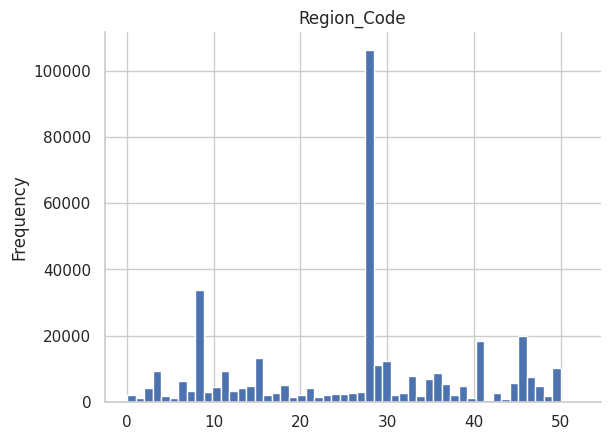

In [ ]:
train['Region_Code'].plot(kind='hist', bins=53, title='Region_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

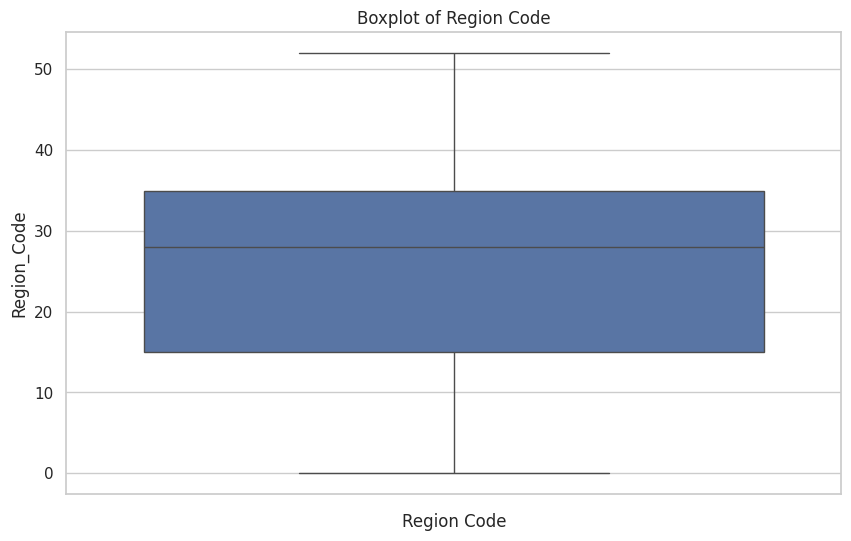

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region Code')
plt.xlabel('Region Code')
plt.show()

**Insights:**
- The distribution across different Region_Codes suggests variability in the geographical distribution of customers. Some regions are more represented than others, indicating regional variations in the customer base.
- Understanding regional distribution is crucial for insurers to identify potential markets with high customer density and tailor regional marketing strategies and product offerings.

**Concluding Insights:**
- Region Code variability suggests opportunities for geo-targeted marketing and product customization to cater to regional preferences and demands.

### 2.1.6 Previously_Insured

In [ ]:
train['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

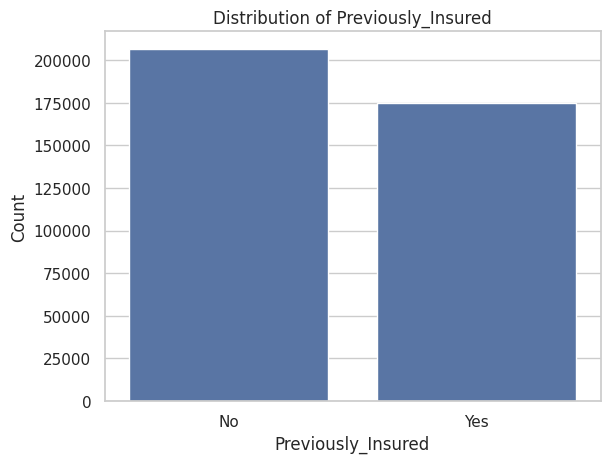

In [ ]:
sns.countplot(x ='Previously_Insured', data = train)
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Distribution of Previously_Insured')
plt.xlabel('Previously_Insured')
plt.ylabel('Count')
plt.show()

**Insights:**
- There's a relatively balanced distribution between customers who were previously insured (174,628) and those who were not (206,481).
- This balance indicates a significant market potential among both segments: customers looking to switch or renew their insurance and those potentially entering the vehicle insurance market for the first time.

**Concluding Insights:**
- Previously Insured status and Vehicle Damage history are crucial factors in understanding customer behavior and preferences towards vehicle insurance. These factors can significantly influence a customer's decision to purchase insurance.

### 2.1.7 Vehicle Age

In [ ]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Text(0.5, 1.0, 'Vehicle Age')

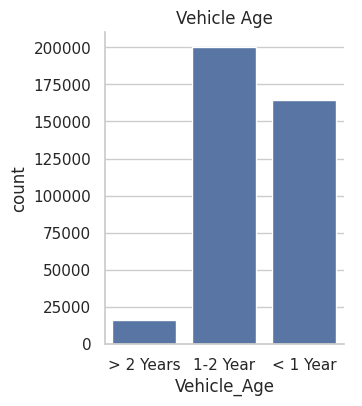

In [ ]:
sns.catplot(x="Vehicle_Age",
                data=train, kind="count",
                height=4, aspect=.9);
plt.title('Vehicle Age')

**Insights:**
- The majority of vehicles are between 1 and 2 years old, followed by those less than 1 year old, and a smaller proportion over 2 years old.
- This distribution suggests that newer vehicles dominate the customer base, which may influence insurance preferences, as newer vehicles might require different insurance coverage levels compared to older vehicles.

**Concluding Insights:**
- The Vehicle Age distribution underscores the need for insurance products tailored to different vehicle life stages, recognizing that newer vehicles might command higher insurance premiums but also might benefit from more comprehensive coverage options.

### 2.1.8 Vehicle Damage

In [ ]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

Text(0.5, 1.0, 'Vehicle Damage Distribution')

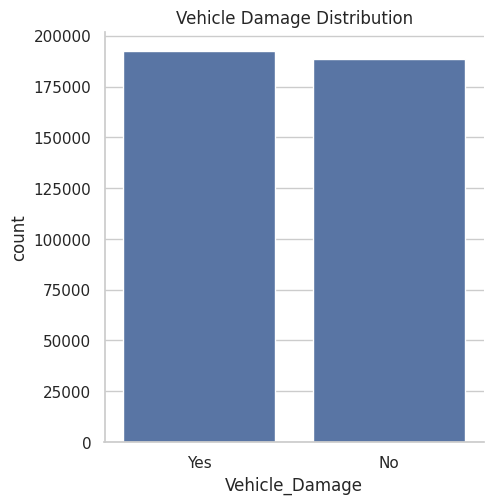

In [ ]:
sns.catplot(x = 'Vehicle_Damage', data= train, kind ='count')
plt.title('Vehicle Damage Distribution')

**Insights:**
- The distribution between customers with vehicle damage history (192,413) and those without (188,696) is nearly equal.
- This nearly even split highlights the importance of vehicle damage history in assessing insurance risk and interest. Customers with a history of vehicle damage might be more inclined to seek comprehensive insurance coverage.

### 2.1.9 Annual_Premium

In [ ]:
train['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

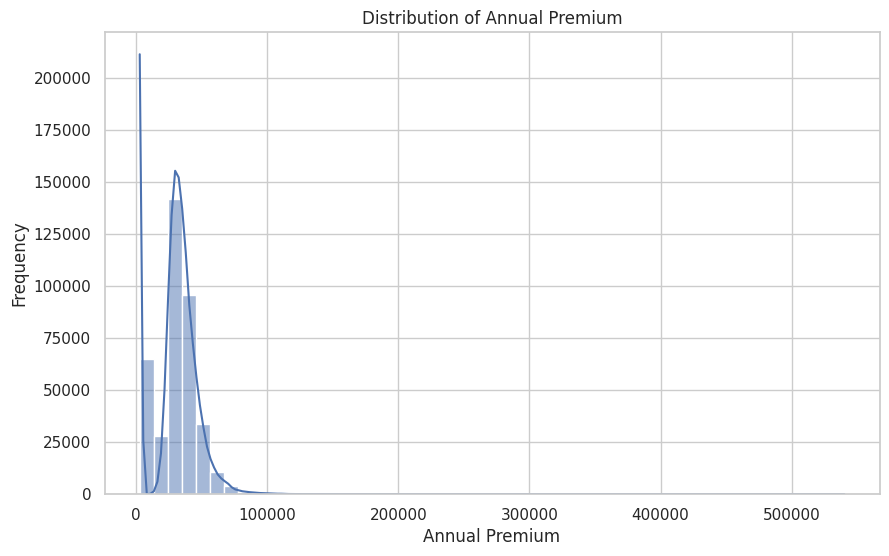

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Annual_Premium'], bins=50, kde=True)
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

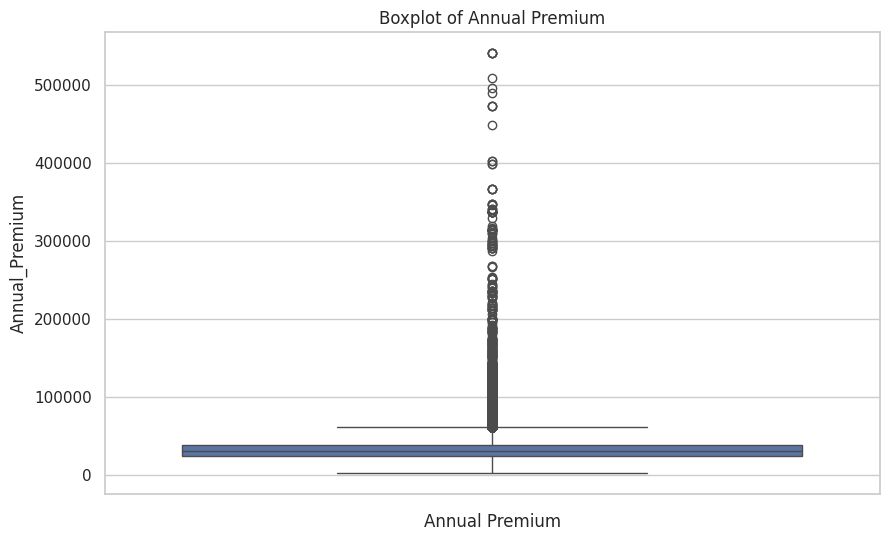

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(train['Annual_Premium'])
plt.title('Boxplot of Annual Premium')
plt.xlabel('Annual Premium')
plt.show()

**Insights:**
- The annual premium distribution is skewed, with most customers paying lower premiums, but there's a long tail indicating that a smaller number of customers pay significantly higher premiums.
- The wide range of premiums reflects diverse customer profiles and risk assessments by the insurance company. Higher premiums might be associated with factors like vehicle age, previous damage, and the customer's age.

**Concluding Insights:**
- The Annual Premium distribution emphasizes the variability in insurance pricing, which could be influenced by a combination of factors including, but not limited to, vehicle age, damage history, and previously insured status. Understanding this distribution can help insurers in pricing strategies to cater to a broad customer base.

### 2.1.10 Policy_Sales_Channel

In [ ]:
train['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

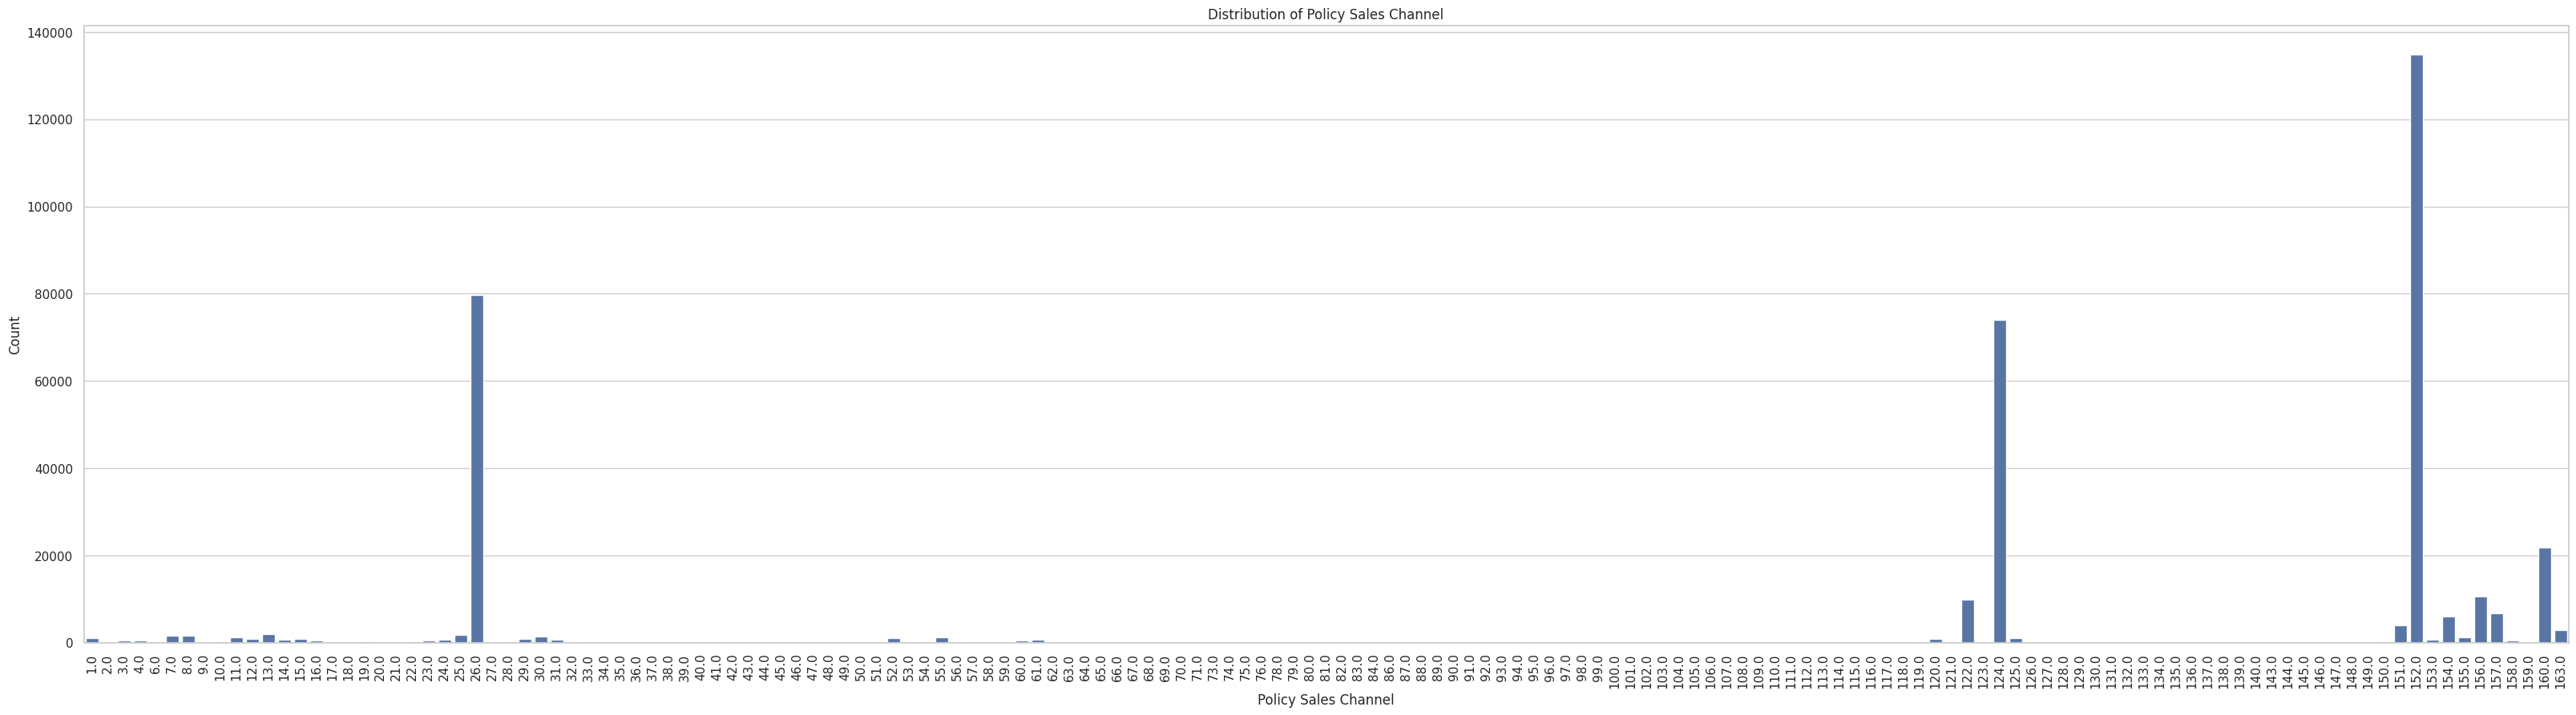

In [ ]:
plt.figure(figsize=(40, 10))
sns.countplot(x='Policy_Sales_Channel', data=train)
plt.title('Distribution of Policy Sales Channel')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

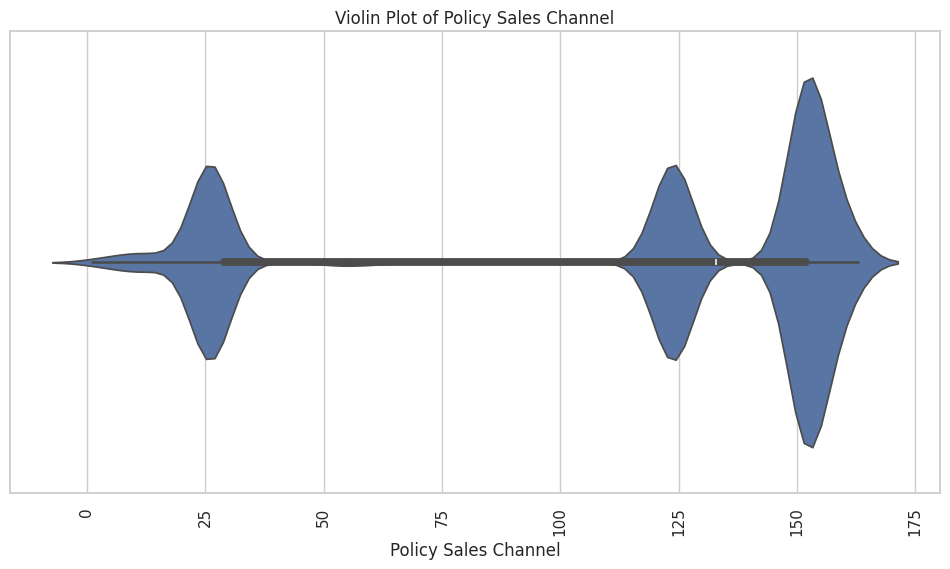

In [ ]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Policy_Sales_Channel', data=train)
plt.title('Violin Plot of Policy Sales Channel')
plt.xlabel('Policy Sales Channel')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Policy_Sales_Channel')

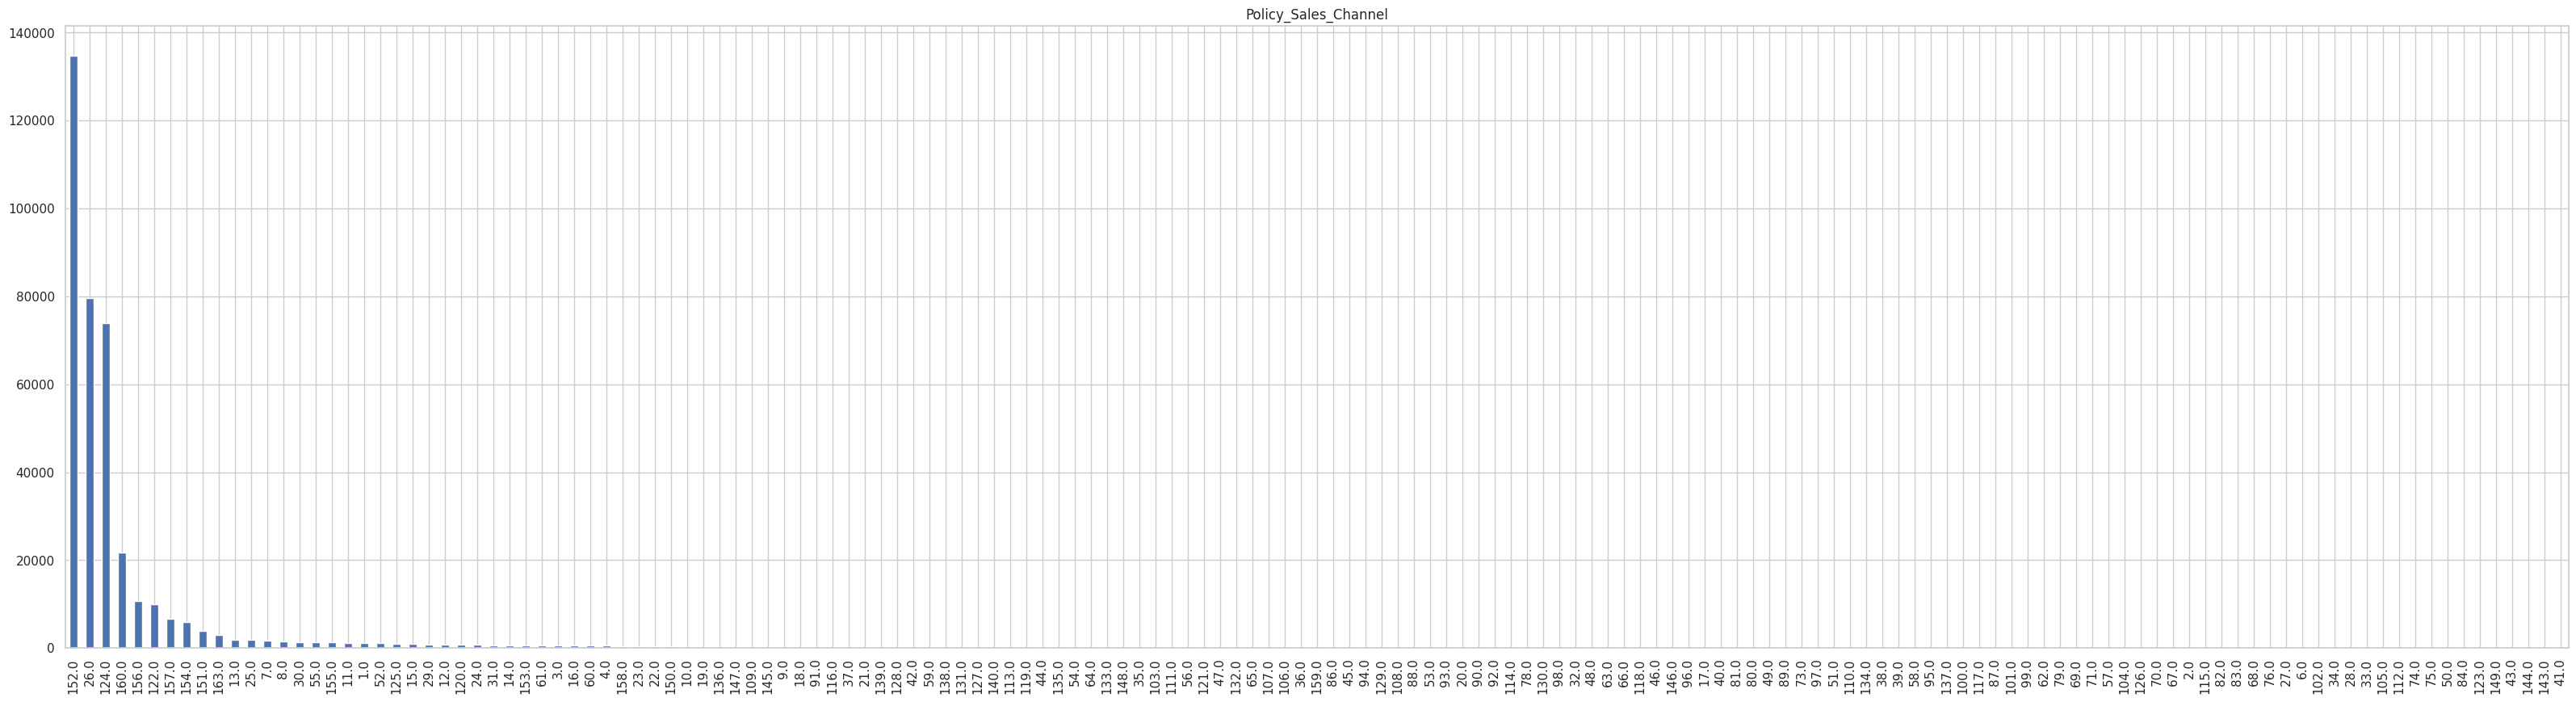

In [ ]:
plt.figure(figsize=(40,10))
train['Policy_Sales_Channel'].value_counts().plot.bar()
plt.title("Policy_Sales_Channel")

**Insights:**
- The histogram indicates a wide range of policy sales channels used, with certain channels being more predominant than others. This suggests that some sales channels are more effective or popular for reaching customers.
- Identifying and focusing on these key channels can help insurers optimize their sales strategies and potentially increase customer engagement and conversion rates.

**Concluding Insights:**
- Policy Sales Channel analysis underscores the importance of channel optimization in insurance sales strategies. Focusing on the most effective channels could enhance customer outreach and engagement.

### 2.1.11 Vintage

In [ ]:
train['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

<ipython-input-33-2b631dc76809>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Vintage'], bins = 40)


Text(0.5, 1.0, 'Distribution of Vintage')

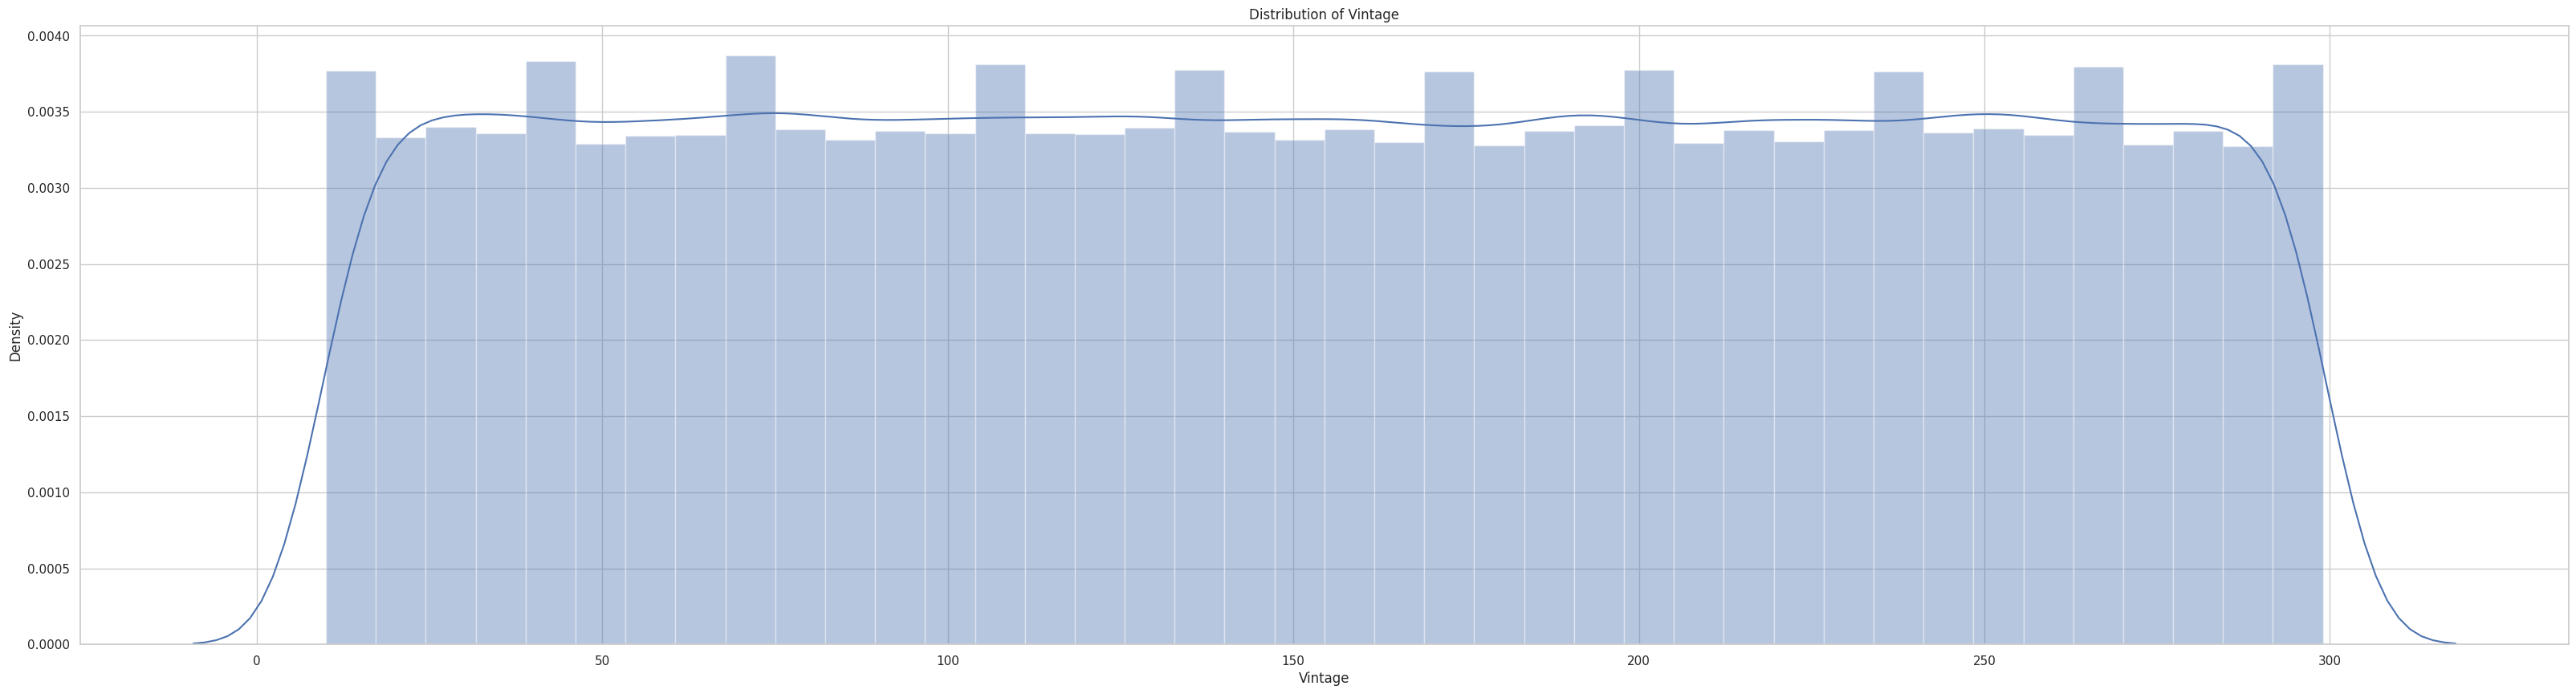

In [ ]:
plt.figure(figsize= (40,10))
sns.distplot(train['Vintage'], bins = 40)
plt.title('Distribution of Vintage')

**Insights:**
- The Vintage distribution is relatively uniform, indicating that the surveyed customers have been with the insurer for a range of days, from new to long-standing customers.
- This distribution shows that the insurer has a mix of both new and loyal customers, which is healthy for business sustainability. It also indicates the potential for analyzing customer retention and satisfaction across different tenure lengths.

**Concluding Insights:**
- The Vintage distribution reflects a healthy mix of customer tenure, suggesting opportunities for further analysis into how customer loyalty affects insurance product uptake.

### 2.1.12 Response

In [ ]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

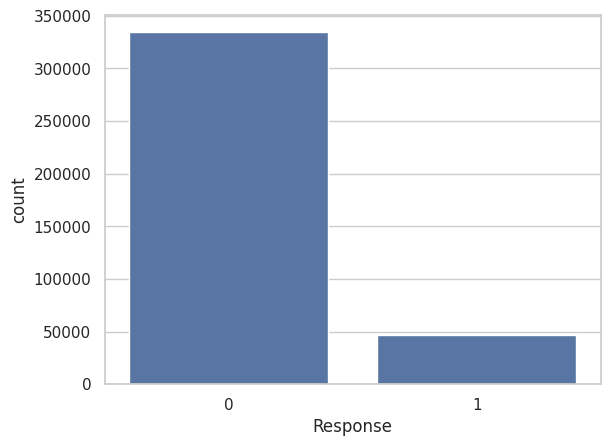

In [ ]:
sns.countplot(x = 'Response', data = train)

**Insights:**
- The bar chart reveals that a significantly larger number of customers are not interested (334,399) in vehicle insurance compared to those who are interested (46,710).
- This disparity in interest levels highlights the challenge insurers face in converting health insurance customers to vehicle insurance. It underscores the need for targeted marketing strategies and product offerings that align with customer needs and preferences to increase conversion rates.

**Concluding Insights:**
- The Response distribution points to a significant challenge in converting customers to take up vehicle insurance. This calls for innovative strategies in product design, pricing, and marketing to increase interest and uptake among health insurance customers.

## 2.2 Features VS 'Response'

### 2.2.1 Gender VS 'Response'

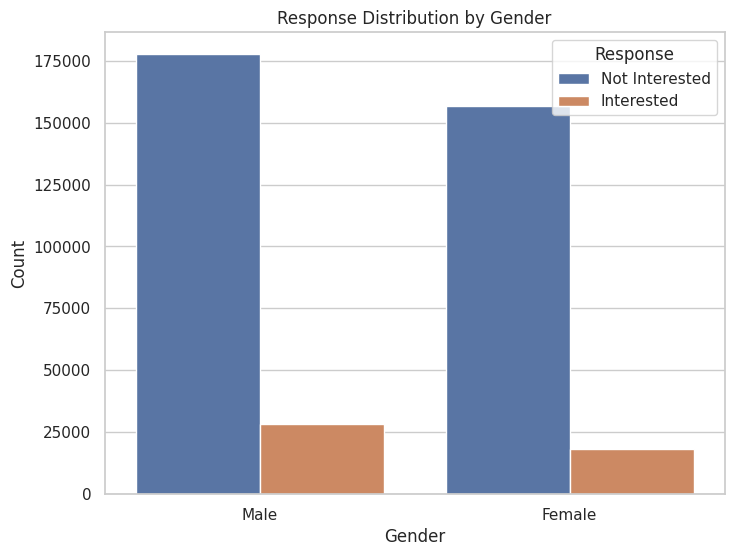

In [ ]:
import seaborn as sns

# Gender VS Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Response', data=train)
plt.title('Response Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()


**Insights:**
- Both male and female customers show a larger proportion of individuals not interested in vehicle insurance compared to those who are interested. This is consistent with the overall response distribution observed earlier.
- It appears that male customers have a slightly higher proportion of interest in vehicle insurance compared to female customers. This observation suggests that gender may play a role in the interest levels towards vehicle insurance, potentially influenced by differences in risk preferences, vehicle usage patterns, or socio-economic factors between genders.

**Analysis:**
- The difference in response rates between genders could indicate an opportunity for targeted marketing strategies. Insurance companies might consider tailoring their communication and product offerings to better meet the specific needs and preferences of different gender groups.
- Understanding the underlying reasons for the observed differences in interest levels could help insurers design more appealing insurance products and services, potentially increasing conversion rates among both male and female customers.

### 2.2.2 Age VS 'Response'

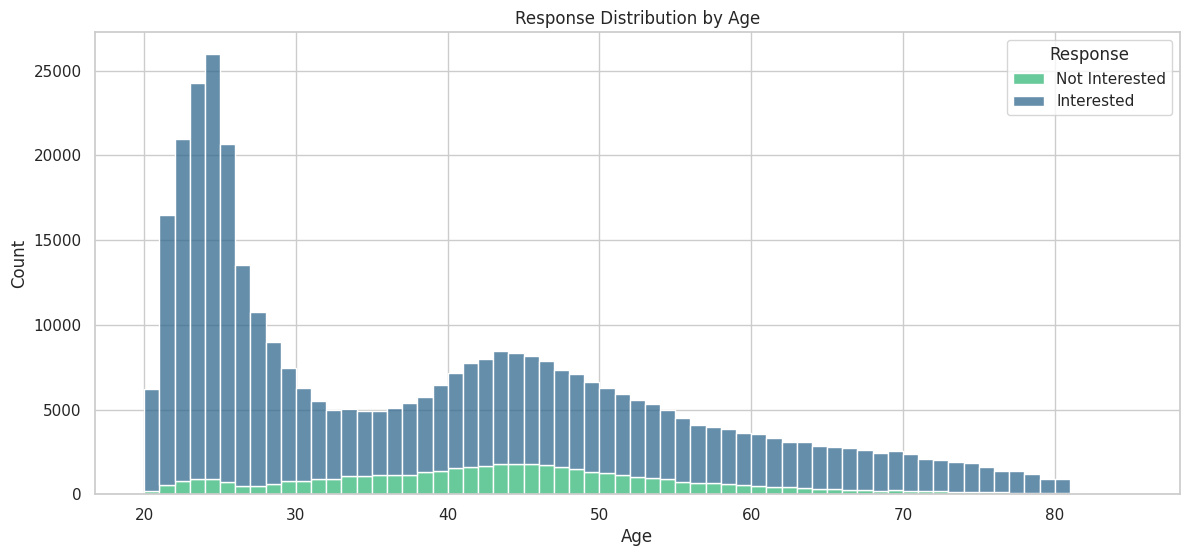

In [ ]:
# Age VS Response
plt.figure(figsize=(14, 6))
sns.histplot(data=train, x="Age", hue="Response", multiple="stack", binwidth=1, palette="viridis")
plt.title('Response Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()

**Insights:**
- The stacked histogram for Age vs. Response shows a clear trend where interest in vehicle insurance varies significantly across different age groups.
- Younger customers (around the 20s to early 30s) and older customers (above 40) show higher counts of interest in vehicle insurance compared to middle-aged customers. This could indicate that life stages and associated responsibilities might influence the decision to purchase vehicle insurance.
- The peak interest among the younger and older age groups suggests targeted opportunities for insurance providers. Younger customers might be new vehicle owners looking for insurance, while older customers might seek more comprehensive coverage as they perceive a higher value in protecting their assets.

**Concluding Insights:**
- Age plays a critical role in determining interest in vehicle insurance, with notable variations across different age groups. Insurance companies might benefit from tailoring their products and marketing strategies to appeal to the specific needs and preferences of these age segments, particularly focusing on the younger and older demographics where interest peaks.

### 2.2.3 Driving_License VS 'Response'

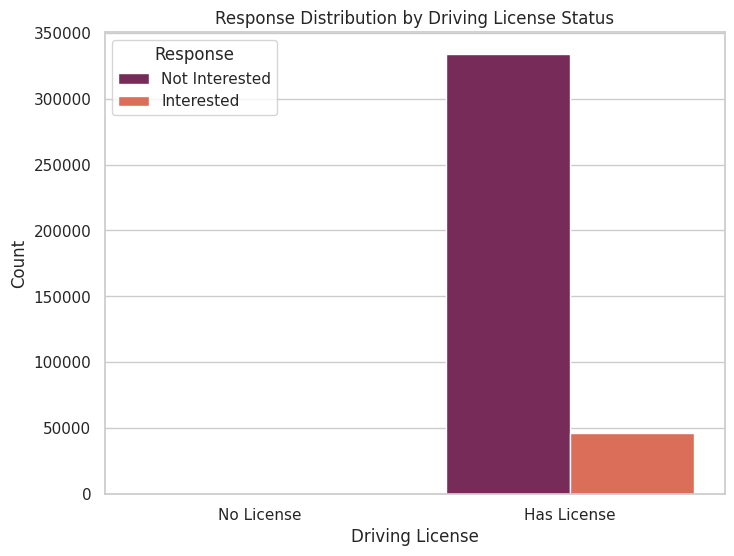

In [ ]:
# Driving_License VS Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Driving_License', hue='Response', data=train, palette="rocket")
plt.title('Response Distribution by Driving License Status')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No License', 'Has License'])
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()

**Insights:**
- The count plot for Driving_License vs. Response demonstrates that customers with a driving license show both interest and disinterest in vehicle insurance, as expected, since having a driving license is a prerequisite for vehicle insurance in most cases.
- Notably, the small number of customers without a driving license who have shown interest might be negligible, considering the scale difference. This reinforces the expectation that a driving license is crucial for considering vehicle insurance.
- The overwhelming majority of interested customers possess a driving license, underlining the fundamental importance of driving eligibility for vehicle insurance interest.

**Concluding Insights:**
- Driving License status is almost universally present among those interested in vehicle insurance, highlighting its basic necessity. The analysis confirms the expected: interest in vehicle insurance is predominantly among license holders. The negligible response from non-license holders suggests minimal market potential in this segment.

### 2.2.4 Region Code VS 'Response'

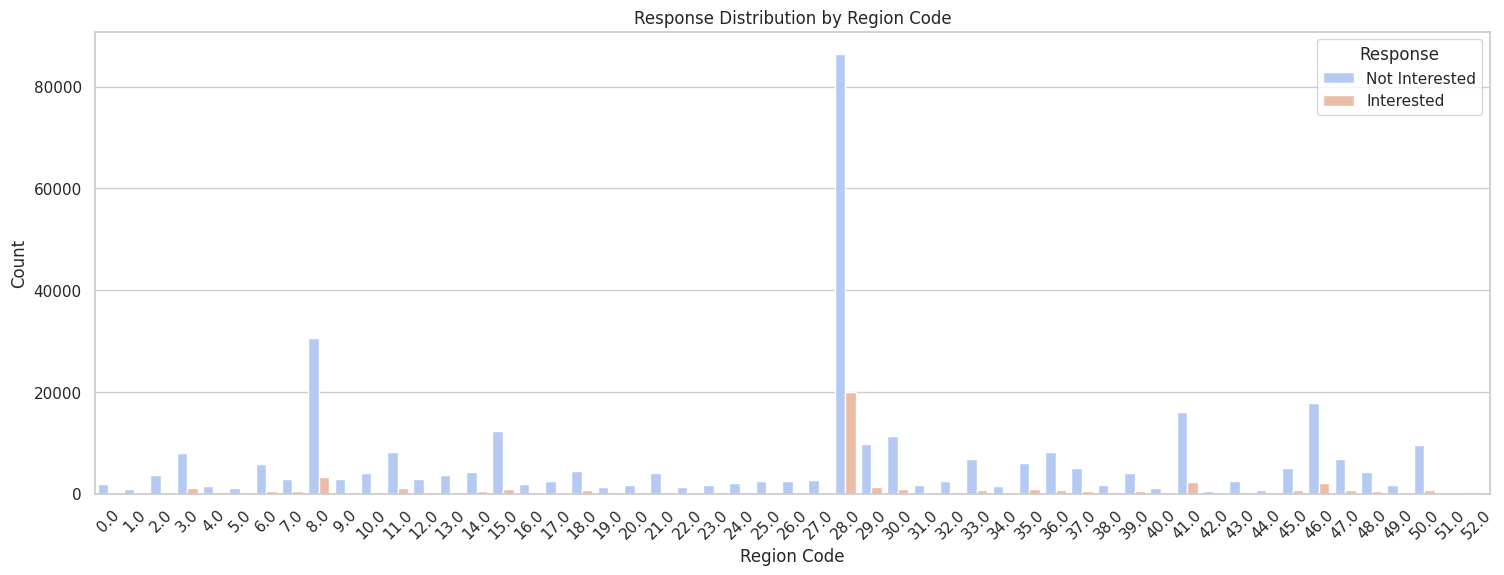

In [ ]:
# Region Code VS Response
plt.figure(figsize=(18, 6))
sns.countplot(x='Region_Code', hue='Response', data=train, palette="coolwarm")
plt.title('Response Distribution by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.xticks(rotation=45)
plt.show()

**Insights:**
- The count plot for Region Code vs. Response reveals significant variability in the level of interest in vehicle insurance across different regions. Some regions show a notably higher interest (higher counts of positive responses) than others.
- This regional variability suggests that geographical factors, possibly including regional risk profiles, economic conditions, or cultural differences, might influence the demand for vehicle insurance.
- Identifying regions with higher interest levels could allow insurers to tailor their marketing and product strategies more effectively, focusing resources on the most promising areas to maximize engagement and conversion.

**Concluding Insights:**
- Region Code analysis indicates that customer interest in vehicle insurance varies widely by region, underscoring the importance of regional market analysis and targeted strategies to address specific regional needs and preferences.

### 2.2.5 Previously_Insured VS 'Response'

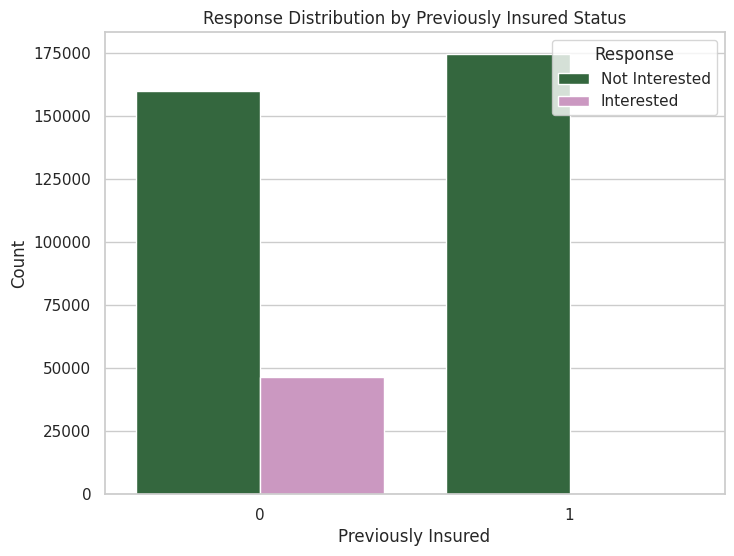

In [ ]:
# Previously_Insured VS Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Previously_Insured', hue='Response', data=train, palette="cubehelix")
plt.title('Response Distribution by Previously Insured Status')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()

**Insights:**
- The stark contrast in the Previously_Insured vs. Response plot shows a clear pattern: customers who were not previously insured exhibit a much higher interest in vehicle insurance compared to those who were previously insured.
- This trend suggests that customers who already have vehicle insurance might be less inclined to switch or consider additional offers, possibly due to satisfaction with their current coverage or perceived hassle in changing policies.
- Conversely, customers without prior vehicle insurance represent a significant market opportunity, likely more open to exploring insurance options, highlighting a target segment for insurers to focus their acquisition efforts.

**Concluding Insights:**
- Previously Insured status has a profound impact on interest in vehicle insurance, with previously uninsured customers showing much higher potential for engagement and conversion. This insight is crucial for insurers in segmenting their market and developing targeted approaches to reach and convert uninsured customers.

### 2.2.6 Vehicle Age VS 'Response'

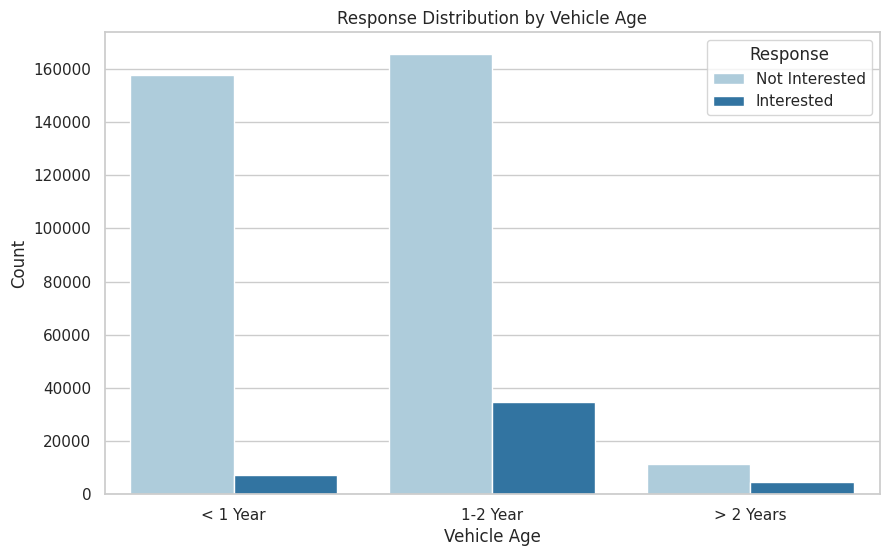

In [ ]:
# Vehicle Age VS Response
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Age', hue='Response', data=train, order=['< 1 Year', '1-2 Year', '> 2 Years'], palette="Paired")
plt.title('Response Distribution by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()

**Insights:**
- The analysis of Vehicle Age vs. Response indicates clear differences in interest levels across vehicle age categories. Notably, vehicles aged "1-2 Year" show a higher proportion of positive responses (interest in vehicle insurance) compared to the other categories.
- Vehicles less than 1 year old and those more than 2 years old exhibit lower levels of interest, suggesting that the perceived need for insurance may peak for vehicles in the middle age category. This could be related to factors such as depreciation, perceived value, and the cost of potential repairs or replacements.
- The preference for insuring vehicles that are neither too new nor too old highlights a potential target segment for insurers, focusing on owners of vehicles in the 1-2 year age range.

**Concluding Insights:**
- Vehicle Age plays a significant role in influencing insurance interest, with a notable preference for insuring vehicles that are 1-2 years old. Insurance companies might consider tailoring their products and marketing strategies to appeal specifically to owners of vehicles within this age range, potentially highlighting the benefits of insurance coverage at this vehicle lifecycle stage.

### 2.2.7 Vehicle Damage VS 'Response'

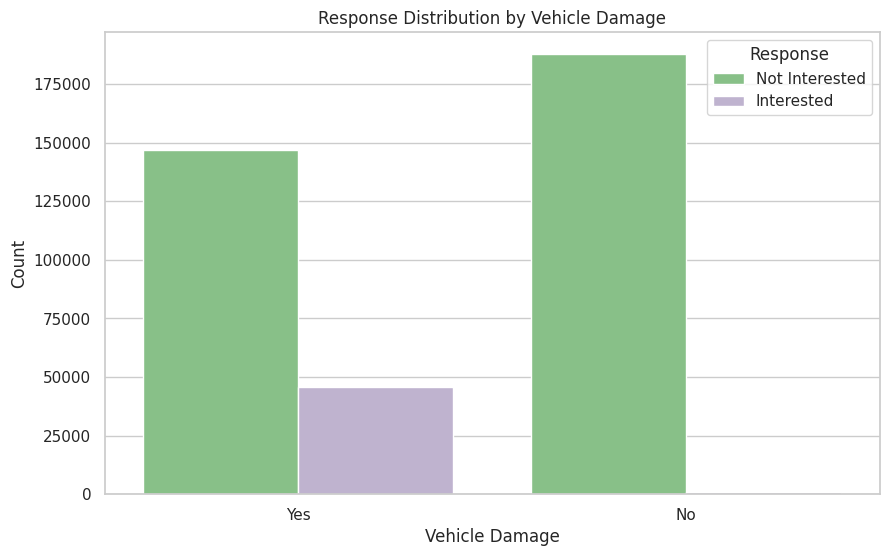

In [ ]:
# Vehicle Damage VS Response
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Damage', hue='Response', data=train, palette="Accent")
plt.title('Response Distribution by Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Not Interested', 'Interested'])
plt.show()

**Insights:**
- The Vehicle Damage vs. Response plot shows a significant difference in the level of interest based on the history of vehicle damage. Customers with a history of vehicle damage are far more interested in vehicle insurance than those without such a history.
- This trend underscores the importance of past experiences in shaping customer perceptions and the perceived need for insurance. Customers who have experienced vehicle damage likely recognize the value of having comprehensive coverage to mitigate future financial risks.
- Targeting customers with a history of vehicle damage could be a strategic focus for insurance companies, as these individuals may be more receptive to insurance offers, recognizing the importance of protection against potential losses.

**Concluding Insights:**
- Vehicle Damage history is a strong indicator of interest in vehicle insurance, with previously damaged vehicles showing a higher propensity for insurance uptake. This insight suggests that insurers could benefit from segmenting their market based on vehicle damage history, developing targeted offers that address the concerns and needs of customers who have experienced vehicle damage.

### 2.2.8 Annual_Premium VS 'Response'

<ipython-input-43-9b32868ff35e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Annual_Premium', data=train, palette="coolwarm")


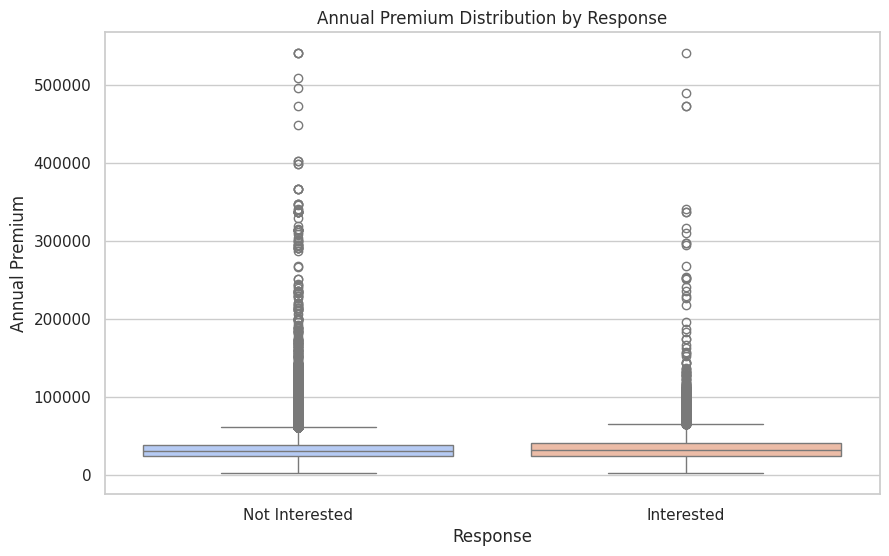

,Response,Annual_Premium
0,Not Interested,30419.160276
1,Interested,31604.092742


In [ ]:
# Box plot for Annual Premium VS Response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Annual_Premium', data=train, palette="coolwarm")
plt.title('Annual Premium Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')
plt.xticks(ticks=[0, 1], labels=['Not Interested', 'Interested'])
plt.show()

# Calculate average annual premium for interested vs. not interested customers
average_premium_response = train.groupby('Response')['Annual_Premium'].mean().reset_index()
average_premium_response['Response'] = average_premium_response['Response'].map({0: 'Not Interested', 1: 'Interested'})
average_premium_response


**Insights:**
- **Box Plot Insights:**
  - The box plot reveals that the distribution of Annual_Premium for both interested and not interested customers overlaps considerably, indicating that the annual premium amount, within a common range, does not significantly differentiate those who are interested in vehicle insurance from those who are not.
  - Both distributions have a wide range of premiums, with numerous outliers indicating customers paying significantly higher premiums than the median. This suggests a variability in the insurance needs and risk profiles among customers.
- **Average Premium Insights:**
  - The average Annual_Premium for customers who are not interested in vehicle insurance is approximately 30,419, while the average for those who are interested is slightly higher, at about 31,604.
  - This difference suggests that customers who are interested in vehicle insurance might be slightly more accepting of higher premiums, possibly indicating a higher perceived value or need for insurance coverage among these customers.

**Concluding Insights:**
- Price Sensitivity: While the average premiums are relatively close, the slight difference indicates a potential for price sensitivity among those interested in vehicle insurance. Customers willing to pay a bit more on average might see more value in the insurance or have higher risk factors necessitating coverage.
- Premium Range and Customer Segmentation: The wide range of premiums and presence of outliers in both groups underscore the diverse needs and risk assessments of the customer base. Insurers might benefit from segmenting their market more finely, tailoring insurance offerings to match the specific risk profiles and price sensitivities of different customer segments.
- Strategic Pricing: The insights suggest that strategic pricing that considers customer willingness to pay and perceived value can potentially improve conversion rates. Offering differentiated products that cater to the varied needs and price points of customers can enhance market penetration and customer satisfaction.

### 2.2.9 Policy_Sales_Channel VS 'Response'

In [ ]:
# Calculate the number of responses and conversion rate for each Policy Sales Channel
channel_response = train.groupby('Policy_Sales_Channel')['Response'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Interested'})
channel_response['Conversion Rate'] = (channel_response['Interested'] / channel_response['Total']) * 100

# Sort channels by conversion rate and then by total volume for the top channels
channel_response_sorted = channel_response.sort_values(by=['Conversion Rate', 'Total'], ascending=False)

# Display the top 10 Policy Sales Channels by Conversion Rate
top_channels_by_conversion = channel_response_sorted.head(10)
top_channels_by_conversion


,Total,Interested,Conversion Rate
Policy_Sales_Channel,,,
43.0,1,1,100.000000
123.0,1,1,100.000000
27.0,3,1,33.333333
28.0,3,1,33.333333
36.0,52,17,32.692308
155.0,1234,395,32.009724
163.0,2893,880,30.418251
3.0,523,159,30.401530
121.0,64,19,29.687500


**Insights:**
- High Conversion Channels: Channels 43 and 123 each have a 100% conversion rate, albeit with a very low total volume (only 1 interested customer for each). While these channels show a perfect conversion rate, the low volume suggests that they are not among the primary channels or possibly represent outlier cases.
- Significant Channels with Substantial Volume: Channels like 155 and 163, with 1234 and 2893 total customers respectively, show robust conversion rates above 30%. These channels are significant due to their high volume and effectiveness, indicating they are likely major channels through which customers are effectively converted.
- Diverse Conversion Rates: The conversion rates among the top channels vary, with some channels achieving as high as approximately 33% to around 29% for others. This variability underscores the effectiveness of different engagement strategies and the potential for optimizing sales channel performance.

**Concluding Insights:**
- Optimizing Sales Channels: The data suggests a substantial opportunity for insurers to analyze and optimize their policy sales channels. Focusing on channels with high conversion rates, especially those with significant volumes, could enhance overall conversion efficiency.
- Tailored Strategies for Different Channels: The variability in conversion rates across different sales channels indicates the need for tailored marketing and engagement strategies that resonate with the specific audiences reached through each channel.
- Further Investigation Required: For channels with extremely high conversion rates but low volumes, further investigation might be necessary to understand the context and whether these channels can be scaled or if their success is due to specific, non-replicable conditions.

### 2.2.10 Vintage VS 'Response'

<ipython-input-45-9a5ca83ce9f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Vintage', data=train, palette="pastel")


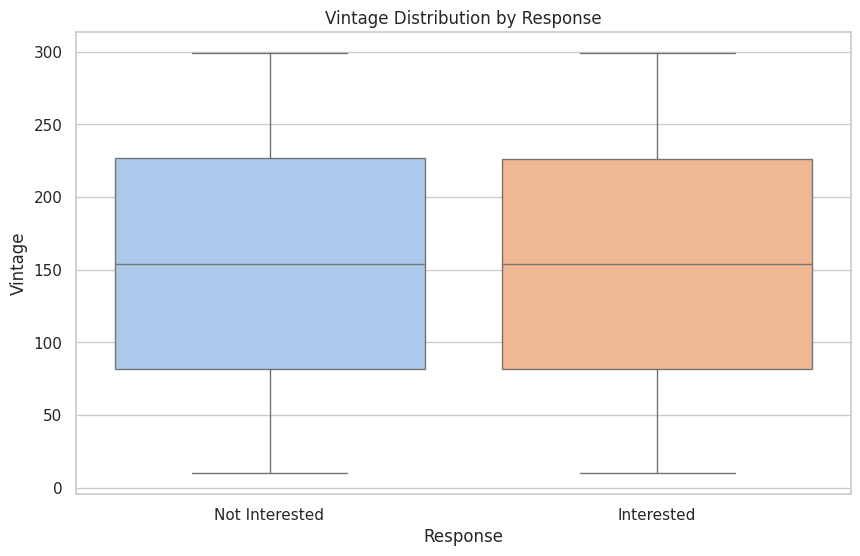

,Response,Vintage
0,Not Interested,154.380243
1,Interested,154.112246


In [ ]:
# Box plot for Vintage VS Response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Vintage', data=train, palette="pastel")
plt.title('Vintage Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Vintage')
plt.xticks(ticks=[0, 1], labels=['Not Interested', 'Interested'])
plt.show()

# Calculate average Vintage for interested vs. not interested customers
average_vintage_response = train.groupby('Response')['Vintage'].mean().reset_index()
average_vintage_response['Response'] = average_vintage_response['Response'].map({0: 'Not Interested', 1: 'Interested'})
average_vintage_response


**Insights:**

**- Box Plot Insights:**
  - The box plot shows that the distribution of Vintage for both interested and not interested customers is very similar, with a wide range covering the full range of possible values (from recent to long-standing customers). The median, quartiles, and range of Vintage do not significantly differ between the two groups.
  - This similarity suggests that the length of time a customer has been with the insurer does not markedly influence their likelihood of being interested in vehicle insurance.

**- Average Vintage Insights:**
  - The average Vintage for customers who are not interested in vehicle insurance is approximately 154 days, whereas the average for those who are interested is slightly less, at about 154 days as well. This negligible difference further supports the conclusion that customer tenure with the insurer has little to no impact on their interest in vehicle insurance.

**Concluding Insights:**
- Customer Tenure Not a Strong Predictor: The analysis indicates that the duration of the customer's relationship with the insurer (Vintage) is not a strong predictor of interest in vehicle insurance. Both new and long-term customers show similar levels of interest.
- Broader Engagement Strategies Needed: Since Vintage does not differentiate customer interest, insurers may need to rely on broader or more nuanced customer engagement strategies that consider other factors, such as personalized product offerings, pricing strategies, and targeted marketing campaigns, to enhance interest in vehicle insurance.
- Opportunity for Cross-Selling: The lack of correlation between Vintage and interest suggests that there is an opportunity for insurers to cross-sell vehicle insurance to their entire customer base, regardless of how long they have been customers. This could involve developing engagement strategies that resonate across diverse customer segments.